In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [9]:
df_obs = pd.read_csv("./hospiedata/obs_table_cleaned_expanded_thresholded.csv", parse_dates=['timestamp_insert'])
df_obs = df_obs.rename(columns={'patientid': 'PatientID'})
df_ptc = pd.read_csv("./hospiedata/id_to_attrs_no_multi_ehr.csv")
df_ptc.head()

C:\Users\prate\Anaconda3\envs\det2\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,idehr,Age,Sex,when_needed,standard,StartOfHospitalization,EndOfHospitalization,Diagnosis,EHR,AMB,death_time,duration_in_hospital,survival_time,survival_time_days,days_in_hospital,age_category
0,1,65.0,F,1.0,0.0,2014-01-02 00:00:00,NaN,psychological,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60-80
1,2550,80.0,M,1.0,0.0,NaN,NaN,Prostate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60-80
2,1081,40.0,F,1.0,1.0,2015-02-25 00:00:00,2015-03-07 00:00:00,Stomach,1.0,0.0,NaN,10 days 00:00:00.000000000,NaN,NaN,10.0,30-60
3,1133,57.0,M,1.0,1.0,2015-04-04 00:00:00,2015-04-05 00:00:00,Brain-snc,1.0,0.0,2015-04-06 09:22:43,1 days 00:00:00.000000000,2 days 09:22:43.000000000,2.0,1.0,30-60
4,1080,57.0,M,1.0,1.0,2015-02-23 00:00:00,2015-03-10 00:00:00,Brain-snc,1.0,0.0,NaN,15 days 00:00:00.000000000,NaN,NaN,15.0,30-60


In [10]:
df_obs.head()

,Unnamed: 0,idehr,timestamp_insert,PatientID,opt_hypotrophy,opt_anxiety,chk_eloquence,anorexia,personal_hygiene,urine_elimination,mobility,hemorrhagic_manifestation,speech,cough,nausea,memory_deficit,cognitive_deficit,active_diuresis,lack_of_appetite,opt_cooperation,opt_memory_deficit_type,opt_care_giver,chk_gastrointestinal_symptoms,chk_bowel_symptoms,opt_dehydration,opt_attitude,pain_freq,pain_relief,breath,consolability,body_language,facial_expression,awareness,asthenia,cachexia,dyspnoea,motor_performance,body_temp,agitation_behavior_freq,diet,cognitive_state,feces_elimination,consumption_help,chk_ausili_presidi_urinary_catheter,chk_ausili_presidi_bladder_catheter,chk_ausili_presidi_absorbency,chk_ausili_presidi_urocondom,chk_ausili_presidi_disposable_sleepers,mood_fear,mood_despair,mood_sadness,mood_helplessness,mood_denial,mood_hopelessness,mood_sense_of_helplessness,mood_negation,mood_sense_of_solitude,mood_senso_dimpotenza,mood_desperation,mood_sense_of_impotence,mood_apathy,mood_hostility,mood_loneliness,mood_closure_in_itself,mood_sense_of_powerlessness,mood_serenity,mood_sense_of_loneliness,mood_demoralisation,mood_happiness,mood_irritability,mood_disappointment,mood_rage,mood_anger
0,0,15,2015-01-12 11:11:44.807,70,NaN,NaN,fluent speech # 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Severe # 3,NaN,NaN,NaN,Apyrexia,quiet # 0,NaN,memory deficits # 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,11,2015-01-12 11:16:03.327,66,Hypotrophy # 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate # 2,NaN,applicant from severe stress # 8,NaN,Apyrexia,quiet # 0,NaN,memory deficits # 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,16,2015-01-12 11:40:00.510,71,Hypotrophy # 0,NaN,confabulation # 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Severe # 3,NaN,NaN,NaN,Apyrexia,quiet # 0,NaN,confused at times 0 #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,16,2015-01-12 11:42:15.270,71,Hypotrophy # 0,NaN,confabulation # 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Severe # 3,NaN,NaN,NaN,Apyrexia,quiet # 0,NaN,confused at times 0 #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1020,2015-01-12 11:59:29.773,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate # 2,NaN,applicant mild strain # 6,NaN,Apyrexia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_obs= df_obs[['idehr', 'PatientID', 'pain_relief', 'timestamp_insert']]
df_obs.head()

,idehr,PatientID,pain_relief,timestamp_insert
0,15,70,NaN,2015-01-12 11:11:44.807
1,11,66,NaN,2015-01-12 11:16:03.327
2,16,71,NaN,2015-01-12 11:40:00.510
3,16,71,NaN,2015-01-12 11:42:15.270
4,1020,86,NaN,2015-01-12 11:59:29.773


In [12]:
df_obs.pain_relief.value_counts()

100% - Total Relief # 10    39481
90% # 9                     15662
80% # 8                      5370
70% # 7                       894
60% # 6                       311
50% # 5                       138
40% # 4                        41
30% # 3                        41
0% - No relief # 0             27
20% # 2                        15
10% # 1                         8
Name: pain_relief, dtype: int64

In [13]:
df_obs.shape

(312765, 4)

In [14]:
# merge into single frame
df_pr = df_obs.merge(df_ptc, on='idehr', how='inner')
df_pr = df_pr[df_pr['pain_relief'].notna()]
df_pr.head()

,idehr,PatientID,pain_relief,timestamp_insert,Age,Sex,when_needed,standard,StartOfHospitalization,EndOfHospitalization,Diagnosis,EHR,AMB,death_time,duration_in_hospital,survival_time,survival_time_days,days_in_hospital,age_category
295,15,70,100% - Total Relief # 10,2015-01-15 17:43:44,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
301,15,70,90% # 9,2015-01-18 16:44:22,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
303,15,70,100% - Total Relief # 10,2015-01-21 06:03:19,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
304,15,70,80% # 8,2015-01-21 12:49:56,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
305,15,70,80% # 8,2015-01-21 16:39:30,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+


In [15]:
# convert to numerical format
df_pr.loc[df_pr['pain_relief'] == '100% - Total Relief # 10', 'pain_relief'] = np.float(100.0)
df_pr.loc[df_pr['pain_relief'] == '90% # 9', 'pain_relief'] = np.float(90.0)
df_pr.loc[df_pr['pain_relief'] == '80% # 8', 'pain_relief'] = np.float(80.0)
df_pr.loc[df_pr['pain_relief'] == '70% # 7', 'pain_relief'] = np.float(70.0)
df_pr.loc[df_pr['pain_relief'] == '60% # 6', 'pain_relief'] = np.float(60.0)
df_pr.loc[df_pr['pain_relief'] == '50% # 5', 'pain_relief'] = np.float(50.0)
df_pr.loc[df_pr['pain_relief'] == '40% # 4', 'pain_relief'] = np.float(40.0)
df_pr.loc[df_pr['pain_relief'] == '30% # 3', 'pain_relief'] = np.float(30.0)
df_pr.loc[df_pr['pain_relief'] == '20% # 2', 'pain_relief'] = np.float(20.0)
df_pr.loc[df_pr['pain_relief'] == '10% # 1', 'pain_relief'] = np.float(10.0)
df_pr.loc[df_pr['pain_relief'] == '0% - No relief # 0', 'pain_relief'] = np.float(0.0)

In [16]:
df_pr['pain_relief'] = df_pr['pain_relief'].astype(str).astype(float)

In [17]:
df_pr.pain_relief.dtype

dtype('float64')

In [18]:
df_pr.pain_relief.value_counts()

100.0    29679
90.0     14377
80.0      4915
70.0       820
60.0       301
50.0       131
30.0        38
40.0        35
0.0         22
20.0        12
10.0         6
Name: pain_relief, dtype: int64

In [19]:
# START OF PROTOTYPE
df1 = df_pr[df_pr['idehr'] == 15].reset_index(drop=True)
# df_pr.idehr.value_counts()

In [20]:
df1.pain_relief.unique()

array([100.,  90.,  80.])

In [21]:
df1.head()

,idehr,PatientID,pain_relief,timestamp_insert,Age,Sex,when_needed,standard,StartOfHospitalization,EndOfHospitalization,Diagnosis,EHR,AMB,death_time,duration_in_hospital,survival_time,survival_time_days,days_in_hospital,age_category
0,15,70,100.0,2015-01-15 17:43:44,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
1,15,70,90.0,2015-01-18 16:44:22,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
2,15,70,100.0,2015-01-21 06:03:19,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
3,15,70,80.0,2015-01-21 12:49:56,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+
4,15,70,80.0,2015-01-21 16:39:30,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+


In [22]:
df1['Day'] = df1['timestamp_insert'].dt.strftime('%D')
df1.head()

,idehr,PatientID,pain_relief,timestamp_insert,Age,Sex,when_needed,standard,StartOfHospitalization,EndOfHospitalization,Diagnosis,EHR,AMB,death_time,duration_in_hospital,survival_time,survival_time_days,days_in_hospital,age_category,Day
0,15,70,100.0,2015-01-15 17:43:44,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,01/15/15
1,15,70,90.0,2015-01-18 16:44:22,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,01/18/15
2,15,70,100.0,2015-01-21 06:03:19,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,01/21/15
3,15,70,80.0,2015-01-21 12:49:56,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,01/21/15
4,15,70,80.0,2015-01-21 16:39:30,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,01/21/15


In [23]:
df1['Day'] = pd.to_datetime(df1['Day'])

In [24]:
df1['date_diff'] = df1['Day'] - df1.loc[0, 'Day']

In [25]:
df1.head()

,idehr,PatientID,pain_relief,timestamp_insert,Age,Sex,when_needed,standard,StartOfHospitalization,EndOfHospitalization,Diagnosis,EHR,AMB,death_time,duration_in_hospital,survival_time,survival_time_days,days_in_hospital,age_category,Day,date_diff
0,15,70,100.0,2015-01-15 17:43:44,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-15,0 days
1,15,70,90.0,2015-01-18 16:44:22,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-18,3 days
2,15,70,100.0,2015-01-21 06:03:19,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-21,6 days
3,15,70,80.0,2015-01-21 12:49:56,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-21,6 days
4,15,70,80.0,2015-01-21 16:39:30,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-21,6 days


In [26]:
df1 = df1.drop(['timestamp_insert'], axis=1)
df1.head()

,idehr,PatientID,pain_relief,Age,Sex,when_needed,standard,StartOfHospitalization,EndOfHospitalization,Diagnosis,EHR,AMB,death_time,duration_in_hospital,survival_time,survival_time_days,days_in_hospital,age_category,Day,date_diff
0,15,70,100.0,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-15,0 days
1,15,70,90.0,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-18,3 days
2,15,70,100.0,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-21,6 days
3,15,70,80.0,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-21,6 days
4,15,70,80.0,85.0,F,1.0,1.0,2014-12-30 00:00:00,2015-02-12 00:00:00,Uterus,1.0,0.0,NaN,44 days 00:00:00.000000000,NaN,NaN,44.0,80+,2015-01-21,6 days


In [27]:
df1.pain_relief.dtype

dtype('float64')

In [28]:
df1.groupby(['date_diff']).mean()

,idehr,PatientID,pain_relief,Age,when_needed,standard,EHR,AMB,survival_time_days,days_in_hospital
date_diff,,,,,,,,,,
0 days,15,70,100.000000,85.0,1.0,1.0,1.0,0.0,NaN,44.0
3 days,15,70,90.000000,85.0,1.0,1.0,1.0,0.0,NaN,44.0
6 days,15,70,86.666667,85.0,1.0,1.0,1.0,0.0,NaN,44.0
7 days,15,70,96.666667,85.0,1.0,1.0,1.0,0.0,NaN,44.0
8 days,15,70,86.666667,85.0,1.0,1.0,1.0,0.0,NaN,44.0
9 days,15,70,100.000000,85.0,1.0,1.0,1.0,0.0,NaN,44.0
11 days,15,70,80.000000,85.0,1.0,1.0,1.0,0.0,NaN,44.0
13 days,15,70,100.000000,85.0,1.0,1.0,1.0,0.0,NaN,44.0
14 days,15,70,95.000000,85.0,1.0,1.0,1.0,0.0,NaN,44.0


In [35]:
df_time = df1[['date_diff', 'idehr', 'pain_relief']]
df_time

,date_diff,idehr,pain_relief
0,0 days,15,100.0
1,3 days,15,90.0
2,6 days,15,100.0
3,6 days,15,80.0
4,6 days,15,80.0
5,7 days,15,100.0
6,7 days,15,100.0
7,7 days,15,90.0
8,8 days,15,90.0
9,8 days,15,80.0


In [151]:
# get random idehrs for a particular diagnosis
diag = 'Ovary'
id_list = np.random.choice(df_ptc[df_ptc['Diagnosis'] == diag].idehr.unique(), 20)
id_list

array([1349, 2568, 2786, 2818, 2189, 2179, 1715, 1244, 2189, 1471, 2604,
       2818, 1303, 1244, 1517, 1104, 2534, 1619, 1887, 2189], dtype=int64)

In [152]:
# assemble dframe for each idehr in list
df_assembled = pd.DataFrame()
for i in id_list:
    df_temp = df_pr[df_pr['idehr'] == i].reset_index(drop=True)
    df_temp['Day'] = df_temp['timestamp_insert'].dt.strftime('%D')
    df_temp['Day'] = pd.to_datetime(df_temp['Day'])
#     print(df_temp.head())
    if df_temp.empty:
#         print('We\'ve got a dead one boys!', i)
        continue
    df_temp['date_diff'] = df_temp['Day'] - df_temp.loc[0, 'Day']
    df_temp = df_temp.groupby(['date_diff']).mean().reset_index()
    df_insert = df_temp[['date_diff', 'idehr', 'pain_relief']]
    if df_assembled.empty:
        df_assembled = df_insert
    else:
        df_assembled = pd.concat([df_assembled, df_insert])
# df_assembled.groupby(['idehr', 'date_diff']).mean()

<Figure size 1440x720 with 0 Axes>

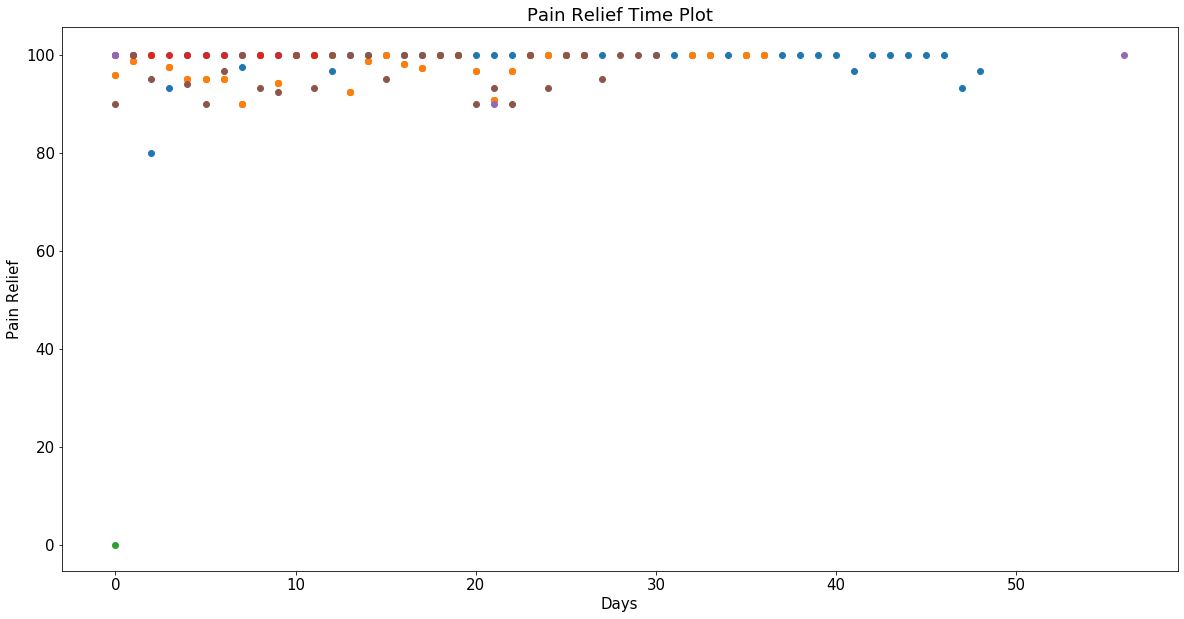

In [153]:
# plot the pain relief for the patients
id_revised = df_assembled.idehr.unique()
plt.figure()
fig, ax = plt.subplots()
for i in id_revised:
#     print(i)
    x = (df_assembled[df_assembled['idehr'] == i].date_diff.dt.total_seconds() / 86400.0).astype('int')
#     print(x)
    y = df_assembled[df_assembled['idehr'] == i].pain_relief
#     print(y)
    labels = (df_assembled.date_diff.dt.total_seconds() / 86400.0).astype('int').unique()
#     print(labels)
    ax.scatter(x, y.fillna(method='ffill'), label=labels)
ax.set_xlabel('Days')
ax.set_ylabel('Pain Relief')
ax.set_title('Pain Relief Time Plot')
plt.show()

In [29]:
# get mean pain relief per cancer
df2 = df_pr.groupby(['Diagnosis', 'idehr']).mean().groupby(['Diagnosis']).mean().reset_index().sort_values(by='Diagnosis')
df2.loc[21, 'Diagnosis'] = 'Endocrine Glands'
df2.loc[22, 'Diagnosis'] = 'Not known'
df2 = df2.sort_values(by='Diagnosis', ascending=False)
df2

,Diagnosis,PatientID,pain_relief,Age,when_needed,standard,EHR,AMB,survival_time_days,days_in_hospital
23,not known,39469.200000,96.272496,77.200000,1.0,1.000000,1.000000,0.000000,34.666667,30.200000
20,Uterus,29576.363636,95.494904,71.454545,1.0,0.909091,0.909091,0.090909,18.888889,21.200000
19,Stomach,31357.344828,97.494061,74.310345,1.0,0.931034,0.931034,0.068966,17.227273,18.111111
18,Skin,24172.769231,95.274777,77.153846,1.0,0.923077,0.923077,0.076923,7.100000,8.583333
17,Prostate,34604.384615,94.660748,80.923077,1.0,1.000000,0.923077,0.076923,19.000000,19.769231
16,Pleura-peritoneal,24466.833333,94.918981,80.833333,1.0,1.000000,1.000000,0.000000,21.333333,21.166667
15,Pancreas,31223.600000,97.677994,76.140000,1.0,0.940000,0.940000,0.060000,14.390244,15.085106
14,Ovary,32793.384615,90.797507,69.769231,1.0,1.000000,0.923077,0.076923,15.272727,17.076923
13,Other,33484.750000,96.243961,85.250000,1.0,0.750000,0.750000,0.250000,7.333333,6.333333
22,Not known,30578.000000,100.000000,88.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000


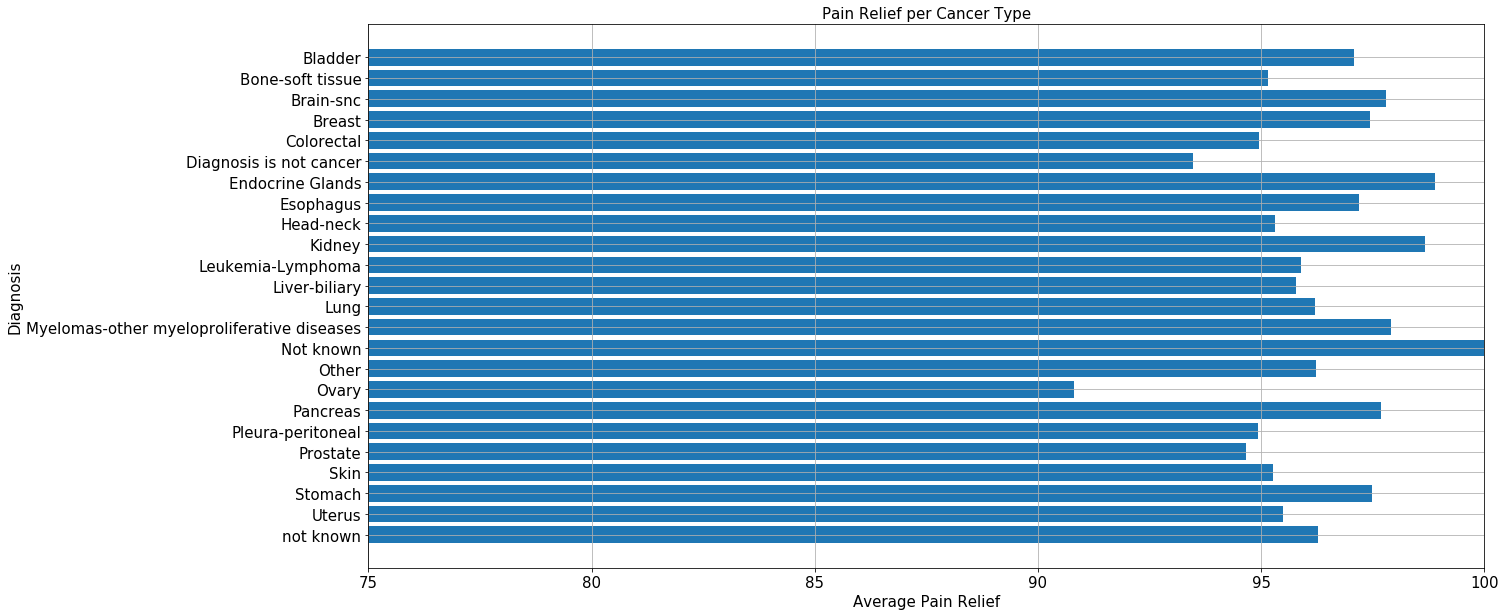

In [30]:
import matplotlib
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(height, rect.get_y()),
                    xytext=(30, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df2['pain_relief'].round(2)
plt.barh(df2['Diagnosis'], labels)
plt.ylabel('Diagnosis', fontsize=15)
plt.xlabel('Average Pain Relief', fontsize=15)
plt.title('Pain Relief per Cancer Type', fontsize=15) # check
plt.grid()
plt.xlim(75, 100)
plt.savefig("./graphs/pain relief/pain_relief_avg.png")
plt.show()

In [31]:
df2['pain_relief'].round(2)

23     96.27
20     95.49
19     97.49
18     95.27
17     94.66
16     94.92
15     97.68
14     90.80
13     96.24
22    100.00
12     97.91
11     96.21
10     95.78
9      95.89
8      98.68
7      95.30
6      97.20
21     98.89
5      93.48
4      94.95
3      97.43
2      97.80
1      95.15
0      97.09
Name: pain_relief, dtype: float64